### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Collection & Analysis

In [2]:
insuranceDF = pd.read_csv("insurance.csv")
insuranceDF

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insuranceDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insuranceDF.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
insuranceDF.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


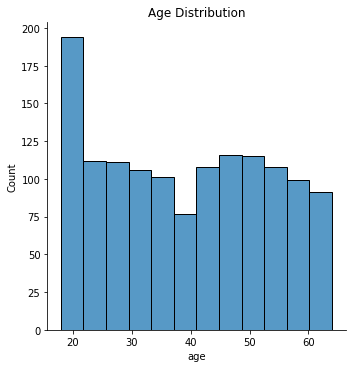

In [6]:
#Distribution of age value
sns.displot(insuranceDF.age)
plt.title("Age Distribution")
plt.show()

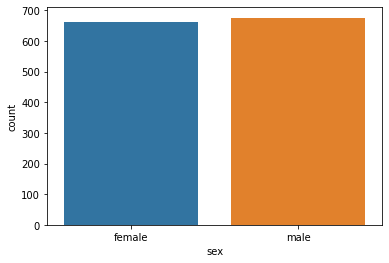

In [7]:
#Distribution of sex
sns.countplot(x='sex',data=insuranceDF,)
plt.show()

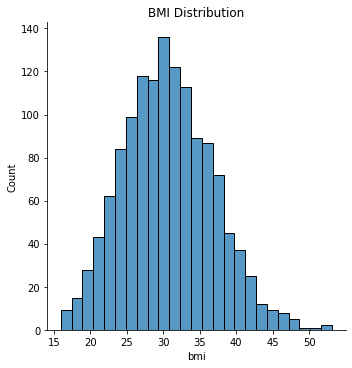

In [8]:
#BMI Distribution
sns.displot(insuranceDF.bmi)
plt.title("BMI Distribution")
plt.show()

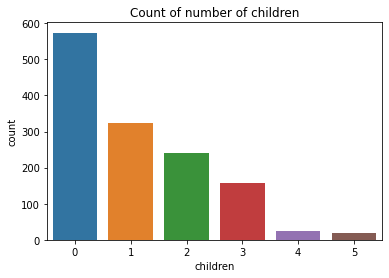

In [9]:
#Distribution of number of children
sns.countplot(x='children',data=insuranceDF,)
plt.title("Count of number of children")
plt.show()

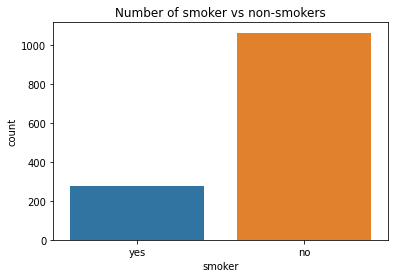

In [10]:
#Distribution of number of smokers
sns.countplot(x='smoker',data=insuranceDF,)
plt.title("Number of smoker vs non-smokers")
plt.show()

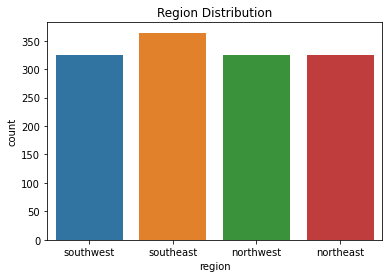

In [11]:
#Distribution of regions
sns.countplot(x='region',data=insuranceDF)
plt.title("Region Distribution")
plt.show()

### Data Preprocessing

Encoding the categorical features:-

->Sex

->Smoker

->Region

In [12]:
insuranceDF_encoded = pd.get_dummies(insuranceDF,columns=['sex','smoker','region'],drop_first=True)

In [13]:
insuranceDF_encoded.rename(columns={'smoker_yes':'isSmoker'},inplace=True)

In [14]:
insuranceDF_encoded

,age,bmi,children,charges,sex_male,isSmoker,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


#### Splitting the dataset into Training and Testing Data

In [15]:
X = insuranceDF_encoded.drop(columns=['charges'])
y = insuranceDF_encoded.charges

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

 ### Model Training

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

### Model Evaluation

In [20]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test,y_pred)

0.7321605632764343

In [21]:
mean_squared_error(y_test,y_pred)

39996830.25318538